## 데이터 처리
1. 좌표값 라벨링 - seg 모델 돌리기, 어노테이션 파일 만들기
2. train / valid / test 나누기 -> train / valid만 사용하기로
3. 이미지 전처리

# 어노테이션을 위한 이미지 전처리
1. 리사이즈 640, 640
2. 정규화
3. 블러링


In [ ]:
!pip install opencv-python


In [ ]:
def preprocess_img(base_dir, img_dir):
    """
    이미지 전처리 함수 - resize, 정규화 , 블러링

    Parameter
        base_dir : train/ valid
        img_dir : 원본 이미지가 있는 경로
    Return

    """

    import os
    import glob
    import cv2
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt

    output_img_dir = os.path.join(base_dir,'images')
    os.makedirs(output_img_dir, exist_ok=True)

    img_paths=glob.glob(img_dir+'/**/*.png', recursive= True)
    for img_path in img_paths:
        img = Image.open(img_path)
        img_np = np.array(img)
        resized_img= cv2.resize(img_np, (640,640))
        # blurred_img= cv2.GaussianBlur(resized_img,(11,11),3)
        normalized_img = resized_img/255.0

        # 저장
        file_name = os.path.basename(img_path)
        file_path = os.path.join(output_img_dir, file_name)
        plt.imsave(file_path, normalized_img)

    output_img = os.listdir(output_img_dir)
    if len(output_img) == len(img_paths):
        print('이미지 전처리 완료', len(output_img))
    else:
        print('이미 전처리 실패')

In [ ]:
# validation
val_base_dir = r'Data/068.농산물 품질(QC) 이미지/01.데이터/2.Validation'
val_img_dir =r'Data/068.농산물 품질(QC) 이미지/01.데이터/2.Validation/원천데이터_230921_add'

preprocess_img(val_base_dir, val_img_dir)

In [ ]:
# training
tr_base_dir = 'Data/068.농산물 품질(QC) 이미지/01.데이터/1.Training'
tr_img_dir = r'Data/068.농산물 품질(QC) 이미지/01.데이터/1.Training/원천데이터_230921_add'
preprocess_img(tr_base_dir, tr_img_dir)

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path =r"Data/068.농산물 품질(QC) 이미지/01.데이터/2.Validation/원천데이터_230921_add/Apple_fuji_M/apple_fuji_M_26-102.png"
img = Image.open(img_path)
# img_ts= torchvision.transforms.ToTensor?
img_np = np.array(img)
resized_img= cv2.resize(img_np, (640,640))
blurred_img= cv2.GaussianBlur(resized_img,(11,11),3)
normalized_img = blurred_img/255.0
plt.imsave('a.jpg',normalized_img)

(1000, 1000, 3)
0.011764705882352941 1.0
3 255
float64
(640, 640, 3)


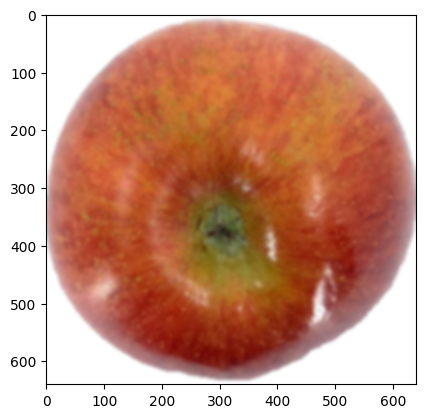

In [ ]:
plt.imshow(normalized_img)
print(img_np.shape)
print(np.min(normalized_img), np.max(normalized_img))
print(np.min(blurred_img), np.max(blurred_img))
print(normalized_img.dtype)
print(normalized_img.shape)


In [ ]:
a = r"C:\classes\FINAL_PROJECT\a.jpg"
result= model(a,save=True)[0]


image 1/1 C:\classes\FINAL_PROJECT\a.jpg: 640x640 1 apple, 1 donut, 913.9ms
Speed: 4.0ms preprocess, 913.9ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict3


# Annotation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 639.0 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [ ]:
import zipfile
import os

file =r'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid/images.zip'
zip_file = zipfile.ZipFile(file)
zip_file.extractall('/content/drive/MyDrive/Data/AIHUB_Fruit/Valid')

# 이미지 파일 개수 확인
len(os.listdir('/content/drive/MyDrive/Data/AIHUB_Fruit/Valid/images'))

12092

In [ ]:
# ## 모델 돌려 mask 좌표값 얻기
# def get_mask(img_path, model):
#     """
#     이미지 파일 경로를 받으면 segmentation 모델 추론 결과 좌표를 리스트로 반환하는 함수
#     Parameter
#         img_path
#         model

#     return
#         mask_txt : 마스크의 xy 좌표를 문자열로 반환
#     """

#     result = model(img_path, verbose=False, save=True)[0]
#     mask_list =[]
#     std_list =[]

#     if result.masks: # 객체 인식된 경우
#         num_obj = int(result.masks.shape[0])
#         if num_obj > 1:
#             print("인식된 객체 개수:", num_obj, img_path)
#             for mask in result.masks: # 객체가 여러 개일 때
#                 a= np.array(mask.xyn).std(axis=1).tolist()
#                 std_list.extend(a)

#             # 표준편차의 합이 큰 것 : 바깥쪽 과일임.
#             row_sums = np.sum(np.array(std_list), axis=1)
#             idx = np.argmax(row_sums)
#         else:
#             idx = 0

#         for i,xy in enumerate(result.masks.xyn[idx]): # 더 큰 객체만
#             if i%20 == 0:
#                 mask_list.extend(xy)
#         mask_txt= " ".join(str(a) for a in mask_list)

#         return mask_txt
#     else:
#         print('객체 인식 실패: ',img_path)
#         return None


In [ ]:
# ## 모델 돌려 mask 좌표값 얻기
# def get_mask(img_path, model):
#     """
#     이미지 파일 경로를 받으면 segmentation 모델 추론 결과 좌표를 리스트로 반환하는 함수
#     Parameter
#         img_path
#         model

#     return
#         mask_txt : 마스크의 xy 좌표를 문자열로 반환
#     """

#     result = model(img_path, verbose=False, save=True)[0]
#     mask_list =[]
#     std_list =[]
#     idx = None

#     if result.masks:
#         #객체인식 성공
#         prev_bbox= 0
#         # 과일인지 확인
#         for i,boxes in enumerate(result.boxes):
#             _,_,w,h = boxes.xywh[0]
#             bbox_area = int(w*h.item())

#             if bbox_area >= 200000:
#                 if bbox_area > prev_bbox:
#                   prev_bbox= bbox_area
#                   idx = i
#                   print(idx,bbox_area)

#         #과일 인식 성공
#         if idx is not None:
#             for i,xy in enumerate(result.masks.xyn[idx]):
#                 if i%20 == 0:
#                     mask_list.extend(xy)
#             mask_txt =" ".join(str(a) for a in mask_list)
#             return mask_txt

#         else:
#             # 과일 아닌 것 하나만 인식된 경우
#             not_fruit= f'과일인식실패_{img_path}'
#             print(not_fruit)
#             return not_fruit
#     else:
#         no_object = f'객체인식실패_{img_path}'
#         print(no_object)
#         return no_object


In [ ]:
## 모델 돌려 mask 좌표값 얻기
def get_mask(img_path, model):
    """
    이미지 파일 경로를 받으면 segmentation 모델 추론 결과 좌표를 리스트로 반환하는 함수
    Parameter
        img_path
        model

    return
        mask_txt : 마스크의 xy 좌표를 문자열로 반환

    """

    result = model(img_path, verbose=False, save=True)[0]
    mask_list =[]
    std_list =[]
    idx = None

    if result.masks:
        #객체인식 성공
        prev_bbox= 0
        # 과일인지 확인
        for i,boxes in enumerate(result.boxes):
            _,_,w,h = boxes.xywh[0]
            bbox_area = int(w*h.item())

            if bbox_area >= 145000:
                if bbox_area > prev_bbox:
                  prev_bbox= bbox_area
                  idx = i
        print(idx,bbox_area, img_path)

        #과일 인식 성공
        if idx is not None:
            for i,xy in enumerate(result.masks.xyn[idx]):
                if i%20 == 0:
                    mask_list.extend(xy)
            mask_txt =" ".join(str(a) for a in mask_list)
            return mask_txt, None
        else:
            # 과일 아닌 것 하나만 인식된 경우
            no_fruit= f'과일인식실패_{img_path}'
            print(no_fruit)
            return None, no_fruit

    else:
        no_object = f'객체인식실패_{img_path}'
        print(no_object)
        return None, str(no_object)


In [ ]:
def get_category_id(fruit_type):
    """
    파일 경로(basename)을 받으면 카테고리 id를 반환하는 함수
    PARAMETER
        fruit_type : 과일 품목
    """
    cat_1 = {'apple':0,'pear':1,'mandarine':2,'persimmon':3}
    # cat_2 = ['fuji','yanggwang','chuhwang','singo','hallabong','onjumilgam','bansi','booyu','daebong']

    return cat_1[fruit_type]

In [ ]:
def create_ann(base_dir, img_dir, model):
    """
    segmentation 결과, 클래스 정보를 받아 annotation txt 파일을 작성하는 함수

    Parameter
        base_dir : training / validation 경로
        img_dir : 이미지 디렉토리 경로
        model : segmentation 추론에 사용하는 모델
    """
    import os
    import glob
    import sys

    sys.stdout = open('output_log.txt', 'w')

    ann_dir = os.path.join(base_dir,'annotations')
    os.makedirs(ann_dir, exist_ok=True)

    img_paths=glob.glob(img_dir+'/**/*.png', recursive= True)
    fail_list = []

    for img_path in img_paths:

        # category id 얻기
        fruit_type = os.path.basename(img_path).split('_')[0] # 품목
        category_id = get_category_id(fruit_type)

        # mask 좌표 얻기  ; 모델 추론
        mask_txt, error_message = get_mask(img_path,model)

        # annotation txt 생성
        if mask_txt:
            # 객체인식 성공
            ann_txt = " ".join([str(category_id), mask_txt])
        else:
            # 객체인식 실패 - 카테고리 id만
            ann_txt = str(category_id)

        # 인식 실패 파일 모음 txt 생성
        if error_message:
            fail_list.append(error_message)


        # 어노테이션 파일 생성 및 기록
        file_name = os.path.basename(img_path).split('.')[0]+'.txt'
        with open(os.path.join(ann_dir, file_name),'w') as f:
            f.write(ann_txt)


    # 인식 실패 파일 생성 및 기록
    fail_txt =" ".join(str(a) for a in fail_list)
    file_path = os.path.join(base_dir,'fail_list.txt')
    with open(file_path,'w') as f:
      f.write((fail_txt))

    # 파일 생성 확인
    ann_path = glob.glob(ann_dir+'/**/*.txt', recursive= True)
    if len(ann_path) == len(img_path):
        print('어노테이션 파일 생성 완료 ',len(ann_path))
    else:
        print('txt 파일 수 불일치')

    sys.stdout.close()




In [ ]:
import os
base_dir = r'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid'
ann_dir = os.path.join(base_dir,'annotations')
ann_dir

'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid/annotations'

In [ ]:
import os
from ultralytics import YOLO
# model
model = YOLO('models/yolov8m-seg.pt')

os.chdir('/content/drive/MyDrive')


# training
tr_base_dir = 'Data/068.농산물 품질(QC) 이미지/01.데이터/1.Training'
tr_img_dir = r'Data/068.농산물 품질(QC) 이미지/01.데이터/1.Training/원천데이터_230921_add'

# validation
val_base_dir = r'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid'
val_img_dir =r'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid/images'

# create_ann(tr_base_dir, tr_img_dir, model)
create_ann(val_base_dir, val_img_dir, model)



100%|██████████| 52.4M/52.4M [00:00<00:00, 107MB/s]


Streaming output truncated to the last 5000 lines.
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved to runs/segment/predict2
Results saved

# 추론 확인

In [ ]:
import os
ann_path = r'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid/annotations'
print('ann 파일 개수:',len(os.listdir(ann_path)))

ann 파일 개수: 12092


In [ ]:
yolo_output = r'/content/drive/MyDrive/runs/segment/predict2'
print('yolo 결과:', len(os.listdir(yolo_output)))

yolo 결과: 12092


In [ ]:
img_dir = r'/content/drive/MyDrive/Data/AIHUB_Fruit/Valid/images'
print('이미지 개수:', len(os.listdir(img_dir)))

이미지 개수: 12092
